In [2]:
import sklearn

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [5]:
import plotly.express as px

In [6]:
from urllib.request import urlretrieve

In [7]:
medical_data_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [8]:
urlretrieve(medical_data_url,'medical_data.csv')

('medical_data.csv', <http.client.HTTPMessage at 0x7f8fe77a9bd0>)

In [9]:
medical_df = pd.read_csv('medical_data.csv')

In [9]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df,x = 'age',marginal = 'box',nbins = 47,title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
fig = px.histogram(medical_df,x = 'bmi',marginal = 'box',color_discrete_sequence = ['red'],title = 'Distribution Of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

Text(0.5, 1.0, 'Distribution of BMI')

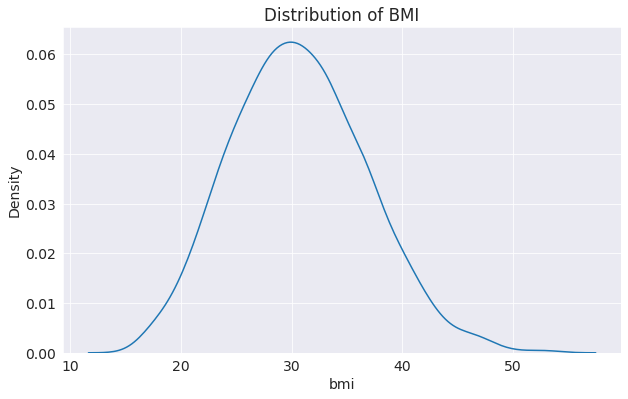

In [ ]:
sns.kdeplot(x = 'bmi',data = medical_df)
plt.title('Distribution of BMI')

In [ ]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
fig = px.histogram(medical_df,x = 'charges',title = 'Distribution of Charges',color = 'smoker',marginal = 'box',color_discrete_sequence = ['green','gray'])
fig.update_layout(bargap = 0.1)
fig.show()

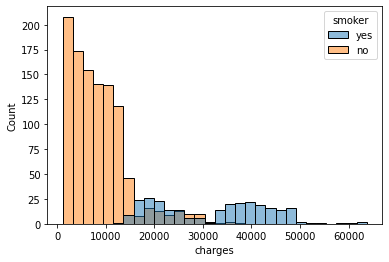

In [ ]:
sns.histplot(x = 'charges',data = medical_df,color = 'red',hue= 'smoker')

Text(0.5, 1.0, 'Charge VS BMI')

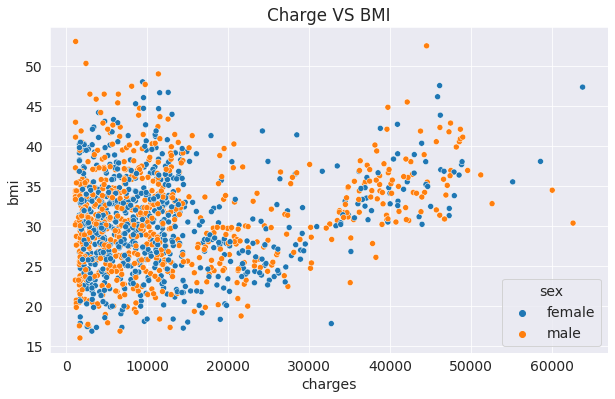

In [ ]:
sns.scatterplot(x = 'charges',y = 'bmi',data= medical_df,hue = 'sex')
plt.title("Charge VS BMI")

In [ ]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
region_group = medical_df.groupby('region')

In [ ]:
region_group.max()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,64,male,48.07,5,yes,58571.07448
northwest,64,male,42.94,5,yes,60021.39897
southeast,64,male,53.13,5,yes,63770.42801
southwest,64,male,47.60,5,yes,52590.82939


In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medical_df,x = 'smoker',color = 'sex',title = 'Smokers per Gender')

In [ ]:
fig = px.scatter(medical_df,x = 'age',y = 'charges',color = 'smoker',opacity = 0.8,hover_data = ['sex'],title = 'Age Vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,x = 'bmi',y = 'charges',color = 'smoker',opacity = 0.8,hover_data = ['sex'],title = 'BMI Vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
#Smoker Data Visualization
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
high = medical_df[medical_df.smoker == 'yes']
low = medical_df[medical_df.smoker == 'no']

In [12]:
arr = np.array([high.smoker.count(),low.smoker.count()])

In [ ]:
arr

array([ 274, 1064])

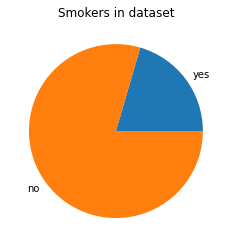

In [ ]:
smoke_labels = ['yes','no']
plt.title('Smokers in dataset')
plt.pie(arr,labels = smoke_labels)
plt.show()

In [13]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [13]:
smoker_values = {'no':0,'yes':1}

In [14]:
medical_df['smoker_values'] = medical_df['smoker'].map(smoker_values)

In [16]:
medical_df.charges.corr(medical_df.smoker_values)

0.787251430498478

In [ ]:
medical_df.corr()

,age,bmi,children,charges,smoker_values
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_values,-0.025019,0.003750,0.007673,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

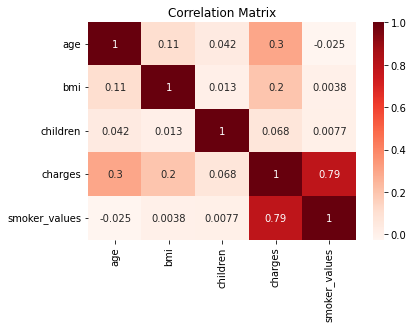

In [ ]:
sns.heatmap(medical_df.corr(),annot = True,cmap = 'Reds')
plt.title("Correlation Matrix")

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_values
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [ ]:
low.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


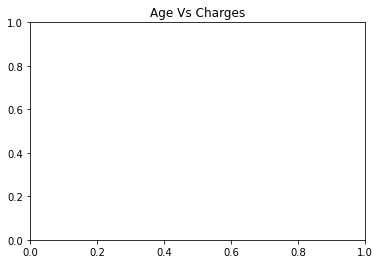

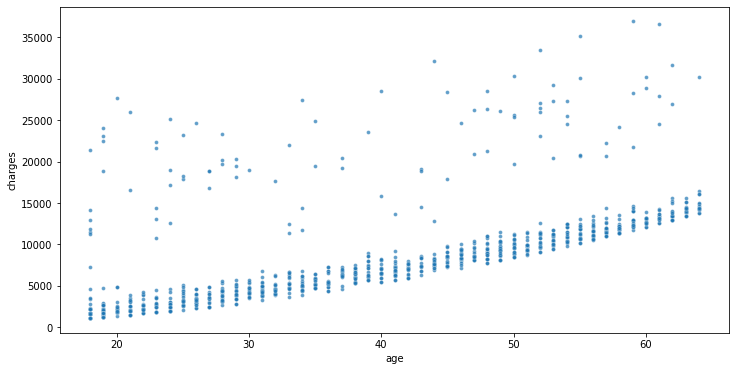

In [ ]:
plt.title("Age Vs Charges")
plt.figure(figsize = (12,6))
sns.scatterplot(data = low,x = 'age',y = 'charges',alpha = 0.7,s = 15);

In [ ]:
#Creating Linear Regression Model

In [15]:
def estimate_charges(age,w = 50,b = 100):
  return w * age + b

In [ ]:
estimate_charges(age = 30)

1600

In [ ]:
ages = low.age
estimate_charges(ages)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

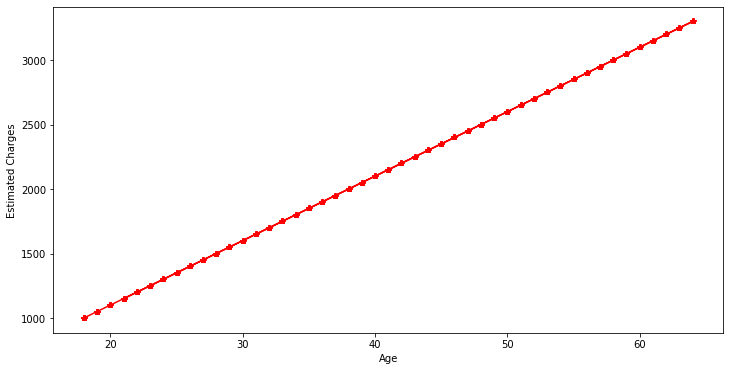

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ages,estimate_charges(ages),color = 'r',marker = '*');

plt.xlabel('Age');
plt.ylabel('Estimated Charges');
plt.show();


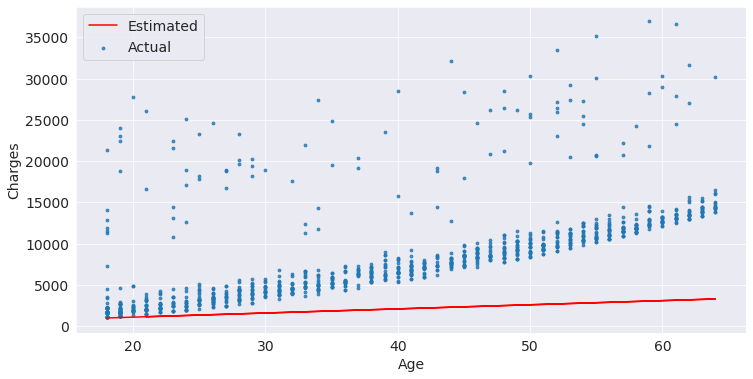

In [ ]:
target = low.charges
plt.figure(figsize = (12,6))
plt.scatter(ages,target,alpha=0.8,s = 8)
plt.plot(ages,estimate_charges(ages),color = 'r')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated','Actual'])
plt.show();

In [16]:
def try_parameters(w,b):
  ages = low.age
  target = low.charges

  estimated_charges = estimate_charges(ages,w,b)

  plt.figure(figsize = (12,6))
  plt.plot(ages,estimated_charges,color = 'r')
  plt.scatter(ages,target,alpha = 0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimated','Actual'])
 

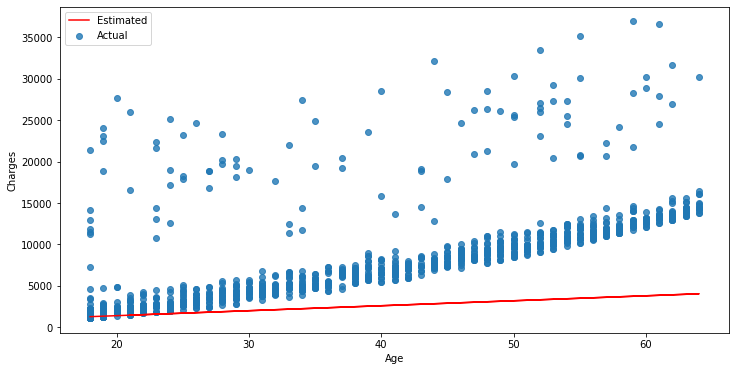

In [ ]:
try_parameters(60,200)

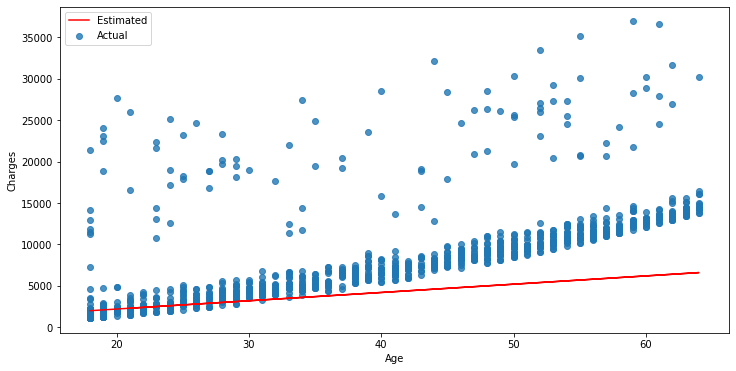

In [ ]:
try_parameters(100,200)

In [ ]:
#Lost/Cost Function

In [17]:
#Root Mean Square Error
def rmse(target,predictions):
  return np.sqrt(np.mean(np.square(target - predictions)))

In [18]:
w = 50
b = 100

In [ ]:
target = low.charges
predictions = estimate_charges(ages,w ,b )

In [19]:
#Modifying the try parameteres function
def try_parameters(w,b):
  plt.figure(figsize = (12,6))
  plt.scatter(ages,target,alpha = 0.8,s = 15)
  plt.plot(ages,predictions,color = 'r',marker = 'o')
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(['Estimated','Actual'])

  loss = rmse(target,predictions)
  print("RMSE Loss : ",loss)

RMSE Loss :  8461.949562575488


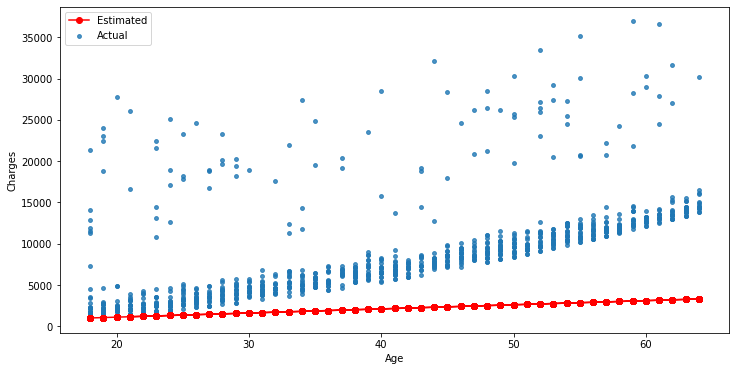

In [ ]:
try_parameters(50,100)

In [ ]:
#Using Scikit Learn for Linear Regression

In [ ]:
import sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
inputs = low[['age']]

In [ ]:
target = low.charges

In [ ]:
inputs.shape


(1064, 1)

In [ ]:
target.shape

(1064,)

In [ ]:
model.fit(inputs,target)

LinearRegression()

In [ ]:
#Predicting for some example ages
model.predict(np.array([[23],[47]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 4055.30443855, 10469.2783465 ])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(target,predictions)

4662.505766636391

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

RMSE Loss :  4662.505766636391


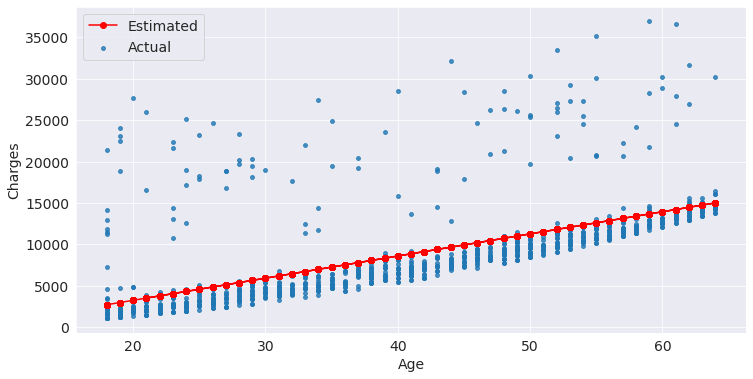

In [ ]:
# w and b values are model.coef and model.intercept
try_parameters(model.coef_,model.intercept_)

In [21]:
#Using SGDRegressor
from sklearn.linear_model import SGDRegressor

In [ ]:
model2 = SGDRegressor()

In [ ]:
inputs = high[['age']]
actual = high.charges

In [ ]:
inputs.shape

(274, 1)

In [ ]:
actual.shape

(274,)

In [ ]:
model2.fit(inputs,actual)

SGDRegressor()

In [ ]:
predictions2 = model2.predict(inputs)

In [ ]:
rmse(actual,predictions2)

19535778265.194416

In [ ]:
predictions2[:5]

array([1.17385586e+10, 2.74415912e+10, 1.46600530e+10, 1.57556134e+10,
       1.72163607e+10])

In [ ]:
model2.coef_

array([3.65186806e+08])

In [ ]:
model2.intercept_

array([4.80000925e+09])

RMSE Loss :  4662.505766636391


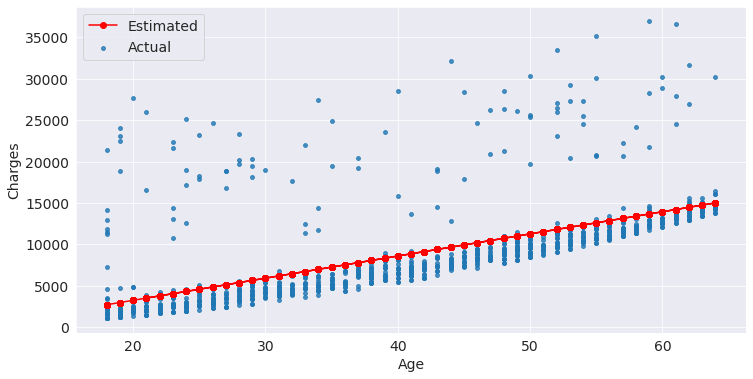

In [ ]:
try_parameters(model2.coef_,model2.intercept_)

In [ ]:
#Linear Regression fro Multiple Features

In [ ]:
input,targets = low[['age','bmi','children']],low.charges

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(input,targets)

LinearRegression()

In [ ]:
predictions = model.predict(input)

In [ ]:
rmse(targets,predictions)

4608.470405038245

In [ ]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [ ]:
model.intercept_

-2809.2976032235892

In [ ]:
fig = px.scatter_3d(low,x = 'age',y = 'bmi',z = 'charges')
fig.update_traces(marker_size = 3,marker_opacity = 0.5)
fig.show()

In [ ]:
#Using Categorical Features

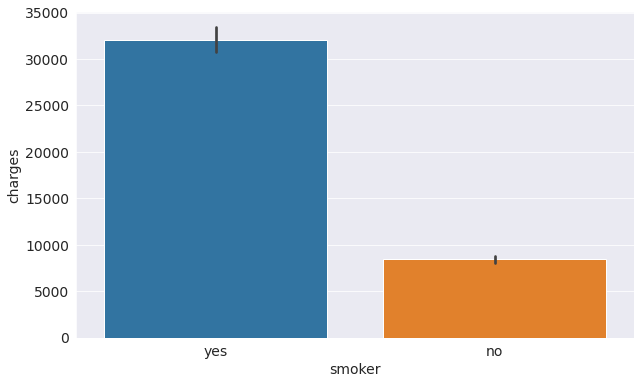

In [ ]:
sns.barplot(data = medical_df,x = 'smoker',y = 'charges')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [22]:
smoker_codes = {'yes':0,'no':1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [ ]:
input,targets = medical_df[['smoker_code','age','bmi']],medical_df.charges

In [23]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(input,targets)

LinearRegression()

In [ ]:
predictions = model.predict(input)

In [ ]:
rmse(targets,predictions)

6083.206042088955

In [ ]:
model.coef_

array([-23823.68449531,    259.54749155,    322.61513282])

In [ ]:
model.intercept_

12146.854070121077

In [66]:
sex_codes = {'female':0,'male':1}
medical_df['sex_code'] = medical_df['sex'].map(sex_codes)

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1


In [ ]:
model = LinearRegression

In [ ]:
input = high[['age']]
targets =high.charges

In [ ]:
input.shape

(274, 1)

In [ ]:
targets.shape

(274,)

In [27]:
#One Hot Encoding
#creates new column for each value

In [26]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


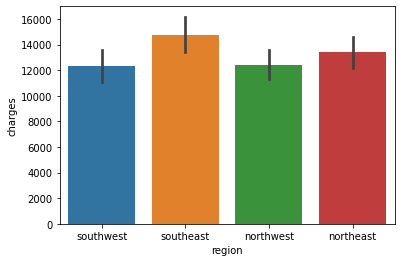

In [28]:
sns.barplot(data = medical_df,x = 'region',y = 'charges')

In [25]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [27]:
medical_df[['northeast','northwest','southwest','southeast']] = one_hot

In [32]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_values,northeast,northwest,southwest,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0


In [58]:
input_cols = ['age','bmi','children','smoker_values','sex_code','northeast','northwest','southwest','southeast']

In [59]:
inputs,targets = medical_df[input_cols],medical_df['charges']

In [60]:
model = LinearRegression().fit(inputs,targets)

In [61]:
predictions = model.predict(inputs)

In [62]:
loss = rmse(targets,predictions)
print("Loss: ",loss)

Loss:  6041.679651174453


In [34]:
model.coef_

array([   256.85635254,    339.19345361,    475.50054515, -23848.53454191,
         -131.3143594 ,    587.00923503,    234.0453356 ,   -448.01281436,
         -373.04175627])

In [35]:
model.intercept_

11322.986730717374

In [36]:
weights_df = pd.DataFrame({
    'feature' : np.append(input_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,-23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southwest,-448.012814
8,southeast,-373.041756
9,1,11322.986731


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [40]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [41]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [43]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [67]:
cat_cols = ['sex_code','smoker_values','northeast','northwest','southwest','southeast']

In [68]:
categorical_data = medical_df[cat_cols].values

In [69]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis = 1)

In [70]:
targets = medical_df['charges']

In [71]:
predictions = model.predict(inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [72]:
loss = rmse(targets,predictions)
print("Loss: ",loss)

Loss:  21448.8254631908


In [73]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending = False)

,feature,weight
3,sex_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,smoker_values,-131.314359
8,southeast,-373.041756
7,southwest,-448.012814
9,1,-12525.547811


In [74]:
#Training and Testing

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size = 0.1)

In [78]:
model = LinearRegression().fit(inputs_train,targets_train)

In [79]:
predictions_test = model.predict(inputs_test)

In [81]:
loss = rmse(targets_test,predictions_test)
print("Loss: ",loss)

Loss:  6894.7995034655405


In [82]:
predictions_train = model.predict(inputs_train)

In [83]:
loss_train = rmse(targets_train,predictions_train)

In [84]:
print(loss_train)

5941.307985952358
